### 2.1 Load and Explore Time Series Data

- Load Time Series Data ('daily-total-female-births.csv')
- Explore the data--first 10 observations, size..
- Query your data by time

In [1]:
import pandas as pd
bdata=pd.read_csv('daily-total-female-births.csv')

In [4]:
bdata.tail()

,Date,Births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [3]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
bdata = pd.read_csv('daily-total-female-births.csv', index_col='Date', parse_dates=True)

In [6]:
bdata.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
bdata.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [8]:
bdata.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [9]:
bdata.loc['1959-02']

,Births
Date,
1959-02-01,23
1959-02-02,31
1959-02-03,44
1959-02-04,38
1959-02-05,50
1959-02-06,38
1959-02-07,51
1959-02-08,31
1959-02-09,31


### 2.2 Date-Time Features
- Date Time Features: these are components of the time step itself for each observation.
- Lag Features: these are values at prior time steps.
- Window Features: these are a summary of values over a fixed window of prior time steps.

- Use the dataset: 'daily-minimum-temperatures.csv'

- Practice on datetime and rolling function using "apple.csv" dataset


In [12]:
import pandas as pd

df = pd.read_csv('daily-minimum-temperatures.csv', index_col='Date', parse_dates=True)

In [13]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [15]:
df['month'] = [df.index[i].month for i in range(len(df))]

In [16]:
df.head()

,Temp,month
Date,,
1981-01-01,20.7,1
1981-01-02,17.9,1
1981-01-03,18.8,1
1981-01-04,14.6,1
1981-01-05,15.8,1


In [17]:
df['day'] = [df.index[i].day for i in range(len(df))]

In [18]:
df.head()

,Temp,month,day
Date,,,
1981-01-01,20.7,1,1
1981-01-02,17.9,1,2
1981-01-03,18.8,1,3
1981-01-04,14.6,1,4
1981-01-05,15.8,1,5


In [19]:
df[df.day==1]

,Temp,month,day
Date,,,
1981-01-01,20.7,1,1
1981-02-01,15.3,2,1
1981-03-01,17.8,3,1
1981-04-01,16.7,4,1
1981-05-01,8.6,5,1
...,...,...,...
1990-08-01,6.8,8,1
1990-09-01,6.0,9,1
1990-10-01,11.3,10,1


In [21]:
df['Temp'].shift(1), df['Temp']

(Date
 1981-01-01     NaN
 1981-01-02    20.7
 1981-01-03    17.9
 1981-01-04    18.8
 1981-01-05    14.6
               ... 
 1990-12-27    14.6
 1990-12-28    14.0
 1990-12-29    13.6
 1990-12-30    13.5
 1990-12-31    15.7
 Name: Temp, Length: 3650, dtype: float64,
 Date
 1981-01-01    20.7
 1981-01-02    17.9
 1981-01-03    18.8
 1981-01-04    14.6
 1981-01-05    15.8
               ... 
 1990-12-27    14.0
 1990-12-28    13.6
 1990-12-29    13.5
 1990-12-30    15.7
 1990-12-31    13.0
 Name: Temp, Length: 3650, dtype: float64)

In [23]:
df_lag1=pd.DataFrame(df['Temp'].shift(1))
df_lag1.columns=['Temp+1']
df_lag1.head()

,Temp+1
Date,
1981-01-01,NaN
1981-01-02,20.7
1981-01-03,17.9
1981-01-04,18.8
1981-01-05,14.6


In [24]:
df = pd.concat([df, df_lag1], axis=1)

In [25]:
df.head()

,Temp,month,day,Temp+1
Date,,,,
1981-01-01,20.7,1,1,NaN
1981-01-02,17.9,1,2,20.7
1981-01-03,18.8,1,3,17.9
1981-01-04,14.6,1,4,18.8
1981-01-05,15.8,1,5,14.6


In [33]:
df = pd.read_csv('daily-minimum-temperatures.csv', index_col='Date', parse_dates=True)
df_lag_1_3 = pd.DataFrame([df['Temp'].shift(1), df['Temp'].shift(2), df['Temp'].shift(3)]).T
df_lag_1_3.columns = ['Temp+1', 'Temp+2', 'Temp+3']
df = pd.concat([df, df_lag_1_3], axis=1)

In [32]:
df_lag_1_3.head()

,Temp+1,Temp+2,Temp+3
Date,,,
1981-01-01,NaN,NaN,NaN
1981-01-02,20.7,NaN,NaN
1981-01-03,17.9,20.7,NaN
1981-01-04,18.8,17.9,20.7
1981-01-05,14.6,18.8,17.9


In [34]:
df.head()

,Temp,Temp+1,Temp+2,Temp+3
Date,,,,
1981-01-01,20.7,NaN,NaN,NaN
1981-01-02,17.9,20.7,NaN,NaN
1981-01-03,18.8,17.9,20.7,NaN
1981-01-04,14.6,18.8,17.9,20.7
1981-01-05,15.8,14.6,18.8,17.9


In [35]:
df = pd.read_csv('daily-minimum-temperatures.csv', index_col='Date', parse_dates=True)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [36]:
shifted = pd.DataFrame(df['Temp'].shift(1))

In [37]:
shifted.head()

,Temp
Date,
1981-01-01,NaN
1981-01-02,20.7
1981-01-03,17.9
1981-01-04,18.8
1981-01-05,14.6


In [38]:
window = shifted.rolling(window=2)

In [39]:
window

Rolling [window=2,center=False,axis=0,method=single]

In [41]:
shifted.head()

,Temp
Date,
1981-01-01,NaN
1981-01-02,20.7
1981-01-03,17.9
1981-01-04,18.8
1981-01-05,14.6


In [43]:
means = window.mean()

In [47]:
df_lag1mean=pd.concat([ shifted, means], axis=1)
df_lag1mean.columns = ['t+1', 'mean(t-1, t)']
df_lag1mean.head()

,t+1,"mean(t-1, t)"
Date,,
1981-01-01,NaN,NaN
1981-01-02,20.7,NaN
1981-01-03,17.9,19.30
1981-01-04,18.8,18.35
1981-01-05,14.6,16.70


In [58]:
df = pd.read_csv('daily-minimum-temperatures.csv', index_col='Date', parse_dates=True)

In [59]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [60]:
width = 3
shifted = pd.DataFrame(df['Temp'].shift(width-1))
window = shifted.rolling(window=width)

In [61]:
shifted.head()

,Temp
Date,
1981-01-01,NaN
1981-01-02,NaN
1981-01-03,20.7
1981-01-04,17.9
1981-01-05,18.8


In [62]:
window

Rolling [window=3,center=False,axis=0,method=single]

In [64]:
window.min()

,Temp
Date,
1981-01-01,NaN
1981-01-02,NaN
1981-01-03,NaN
1981-01-04,NaN
1981-01-05,17.9
...,...
1990-12-27,10.0
1990-12-28,10.0
1990-12-29,12.9


In [52]:
newdf = pd.concat([df,shifted, window.min(),window.max(), window.mean()], axis=1)
newdf.columns=['Temp', 'Temp+2', 'min', 'max', 'mean']

In [53]:
newdf.head()


,Temp,Temp+2,min,max,mean
Date,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN
1981-01-02,17.9,NaN,NaN,NaN,NaN
1981-01-03,18.8,20.7,NaN,NaN,NaN
1981-01-04,14.6,17.9,NaN,NaN,NaN
1981-01-05,15.8,18.8,17.9,20.7,19.133333


In [57]:
import numpy as np
np.mean(np.array((2,5,np.NaN)))

nan

In [69]:
df = pd.read_csv('daily-minimum-temperatures.csv',index_col='Date', parse_dates=True) 

In [70]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [73]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [75]:
df['Temp'].values

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [76]:
temps = pd.DataFrame(df['Temp'].values)

In [80]:
temps2 = temps.expanding()

In [81]:
temps2

,0
0,20.700000
1,19.300000
2,19.133333
3,18.000000
4,17.560000
...,...
3645,11.174712
3646,11.175377
3647,11.176014
3648,11.177254


In [82]:
temps

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
3645,14.0
3646,13.6
3647,13.5
3648,15.7


In [83]:
temps.shift(-1)

,0
0,17.9
1,18.8
2,14.6
3,15.8
4,15.8
...,...
3645,13.6
3646,13.5
3647,15.7
3648,13.0


In [89]:
temps2 = temps.expanding()
dataframe_new = pd.concat([temps,temps2.min(), temps2.mean(), temps2.max(), temps.shift(-1)],axis=1)
dataframe_new.columns = ['t','min', 'mean', 'max', 't+1']

In [90]:
dataframe_new.head()

,t,min,mean,max,t+1
0,20.7,20.7,20.700000,20.7,17.9
1,17.9,17.9,19.300000,20.7,18.8
2,18.8,17.9,19.133333,20.7,14.6
3,14.6,14.6,18.000000,20.7,15.8
4,15.8,14.6,17.560000,20.7,15.8


In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
dataframe_new.isnull()

,t,min,mean,max,t+1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3645,False,False,False,False,False
3646,False,False,False,False,False
3647,False,False,False,False,False
3648,False,False,False,False,False


In [93]:
dataframe_new = dataframe_new.loc[~dataframe_new.isnull().any(axis=1)]

In [95]:
dataframe_new.shape

(3649, 5)

In [96]:
LinReg1 = LinearRegression()

In [102]:
X = dataframe_new.drop(['t+1', 't'],axis=1)
y = dataframe_new[['t+1']]

In [103]:
LinReg1.fit(X,y)

LinearRegression()

In [104]:
yhat = LinReg1.predict(X)

In [105]:
yhat[:10], y[:10]

(array([[18.80816976],
        [16.90006697],
        [17.23275363],
        [13.95258956],
        [14.83088234],
        [15.41641086],
        [15.83464552],
        [15.74909752],
        [16.25400157],
        [15.7793686 ]]),
     t+1
 0  17.9
 1  18.8
 2  14.6
 3  15.8
 4  15.8
 5  15.8
 6  17.4
 7  21.8
 8  20.0
 9  16.2)

In [109]:
from sklearn.metrics import mean_squared_error
import math

In [107]:
mean_squared_error(y, yhat)**(1/2)

3.950247806840787

In [110]:
rmse = math.sqrt(mean_squared_error(y, yhat))

In [111]:
rmse

3.950247806840787

In [112]:
y.mean()

t+1    11.175144
dtype: float64

In [115]:
math.sqrt(mean_squared_error(y,np.array([y.mean()]*len(y))))

4.068783620516061

In [ ]:
((y1-yhat1)^2 + (y2-yhat2)^+....)/dataframe_new.shape[0]

** Exercise from https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/

Pandas dataframe.rolling() function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time-series data. In very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case, all the ‘k’ values are equally weighted.

In [135]:
import pandas as pd
from datetime import datetime 
dfA = pd.read_csv('apple.csv')

In [118]:
dfA.head()


,date,close,volume,open,high,low
0,16:00,192.23,"46,541,444",191.72,197.18,191.4501
1,2018/11/13,192.23,46725710.0000,191.63,197.18,191.4501
2,2018/11/12,194.17,50991030.0000,199.00,199.85,193.7900
3,2018/11/09,204.47,34317760.0000,205.55,206.01,202.2500
4,2018/11/08,208.49,25289270.0000,209.98,210.12,206.7500


In [119]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    254 non-null    object 
 1   close   254 non-null    float64
 2   volume  254 non-null    object 
 3   open    254 non-null    float64
 4   high    254 non-null    float64
 5   low     254 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.0+ KB


In [136]:
dfA.drop(dfA.index[0], inplace=True)

In [122]:
dfA.head()

,date,close,volume,open,high,low
1,2018/11/13,192.23,46725710.0000,191.63,197.18,191.4501
2,2018/11/12,194.17,50991030.0000,199.00,199.85,193.7900
3,2018/11/09,204.47,34317760.0000,205.55,206.01,202.2500
4,2018/11/08,208.49,25289270.0000,209.98,210.12,206.7500
5,2018/11/07,209.95,33291640.0000,205.97,210.06,204.1300


In [137]:
dfA.to_csv('apple2.csv')

In [138]:
dfA['date'] = pd.to_datetime(dfA['date'], format = '%Y/%m/%d')

In [139]:
dfA.head()

,date,close,volume,open,high,low
1,2018-11-13,192.23,46725710.0000,191.63,197.18,191.4501
2,2018-11-12,194.17,50991030.0000,199.00,199.85,193.7900
3,2018-11-09,204.47,34317760.0000,205.55,206.01,202.2500
4,2018-11-08,208.49,25289270.0000,209.98,210.12,206.7500
5,2018-11-07,209.95,33291640.0000,205.97,210.06,204.1300


In [126]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 1 to 253
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    253 non-null    datetime64[ns]
 1   close   253 non-null    float64       
 2   volume  253 non-null    object        
 3   open    253 non-null    float64       
 4   high    253 non-null    float64       
 5   low     253 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 12.0+ KB


In [127]:
dfA.columns

Index(['date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')

In [140]:
dfA.set_index('date', inplace=True)

In [141]:
dfA.head()

,close,volume,open,high,low
date,,,,,
2018-11-13,192.23,46725710.0000,191.63,197.18,191.4501
2018-11-12,194.17,50991030.0000,199.00,199.85,193.7900
2018-11-09,204.47,34317760.0000,205.55,206.01,202.2500
2018-11-08,208.49,25289270.0000,209.98,210.12,206.7500
2018-11-07,209.95,33291640.0000,205.97,210.06,204.1300


In [131]:
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%Y/%m/%d")

dfA2 = pd.read_csv('apple2.csv', parse_dates = ['date'], index_col = 'date',\
                 date_parser=custom_date_parser)

In [132]:
dfA2.head()

,Unnamed: 0,close,volume,open,high,low
date,,,,,,
2018-11-13,1,192.23,46725710.0,191.63,197.18,191.4501
2018-11-12,2,194.17,50991030.0,199.00,199.85,193.7900
2018-11-09,3,204.47,34317760.0,205.55,206.01,202.2500
2018-11-08,4,208.49,25289270.0,209.98,210.12,206.7500
2018-11-07,5,209.95,33291640.0,205.97,210.06,204.1300


In [142]:
dfA2.drop('Unnamed: 0', axis=1, inplace=True)

In [144]:
dfA.close.rolling(3, win_type = 'triang').sum()

date
2018-11-13        NaN
2018-11-12        NaN
2018-11-09    392.520
2018-11-08    405.800
2018-11-07    415.700
               ...   
2017-11-17    341.625
2017-11-16    340.690
2017-11-15    340.715
2017-11-14    340.300
2017-11-13    342.865
Name: close, Length: 253, dtype: float64

In [145]:
dfA.close.rolling(3).sum()

date
2018-11-13       NaN
2018-11-12       NaN
2018-11-09    590.87
2018-11-08    607.13
2018-11-07    622.91
               ...  
2017-11-17    513.27
2017-11-16    511.23
2017-11-15    510.33
2017-11-14    511.52
2017-11-13    514.39
Name: close, Length: 253, dtype: float64

In [146]:
from scipy.signal.windows import triang
triang(3)

array([0.5, 1. , 0.5])

In [150]:
def triangle_sum(window):
    weights=np.array([3,0.5,0.5])
    return (weights * window).sum()

In [151]:
dfA.close.rolling(3).apply(triangle_sum)

date
2018-11-13        NaN
2018-11-12        NaN
2018-11-09    776.010
2018-11-08    788.990
2018-11-07    822.630
               ...   
2017-11-17    689.485
2017-11-16    680.565
2017-11-15    680.540
2017-11-14    683.510
2017-11-13    679.895
Name: close, Length: 253, dtype: float64

### 2.3 Resampling and Interpolation
- Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
- Downsampling: Where you decrease the frequency of the samples, such as from days to months.
- use the dataset: 'shampoo-sales.csv'

In [152]:
import pandas as pd
from datetime import datetime

In [158]:
data_sh = pd.read_csv('shampoo-sales.csv', index_col='Month', parse_dates=True)

In [159]:
data_sh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [160]:
data_sh.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [161]:
data_sh.shape

(36, 1)

In [170]:
def parser(x):
    return datetime.strptime('190'+x, "%Y-%m")

In [171]:
data_sh2 = pd.read_csv('shampoo-sales.csv', index_col=0, parse_dates=True,
                      date_parser=parser)

In [172]:
data_sh2.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [175]:
upsampled=data_sh2.resample('D').mean()

In [176]:
upsampled.head(32)

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
1901-01-06,NaN
1901-01-07,NaN
1901-01-08,NaN
1901-01-09,NaN


In [178]:
interpolated = upsampled.interpolate(method='linear')

<Axes: xlabel='Month'>

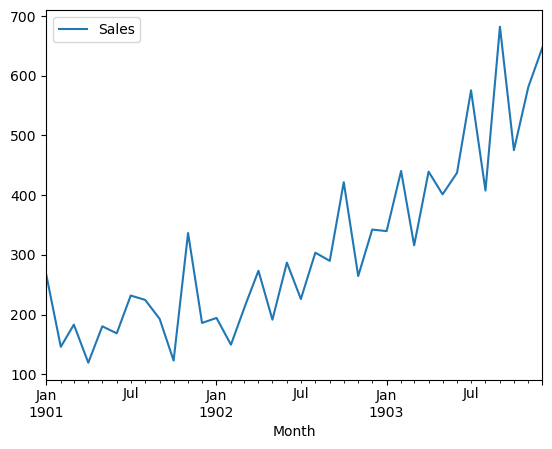

In [180]:
from matplotlib import pyplot as plt
interpolated.plot()

In [182]:
backfilled = upsampled.bfill()
backfilled.head(32)

,Sales
Month,
1901-01-01,266.0
1901-01-02,145.9
1901-01-03,145.9
1901-01-04,145.9
1901-01-05,145.9
1901-01-06,145.9
1901-01-07,145.9
1901-01-08,145.9
1901-01-09,145.9


<Axes: xlabel='Month'>

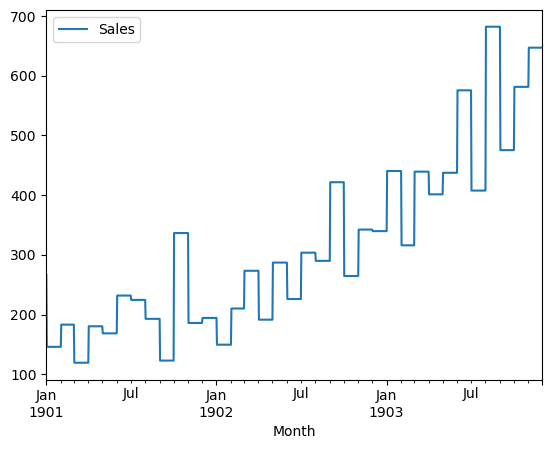

In [183]:
backfilled.plot()

<Axes: xlabel='Month'>

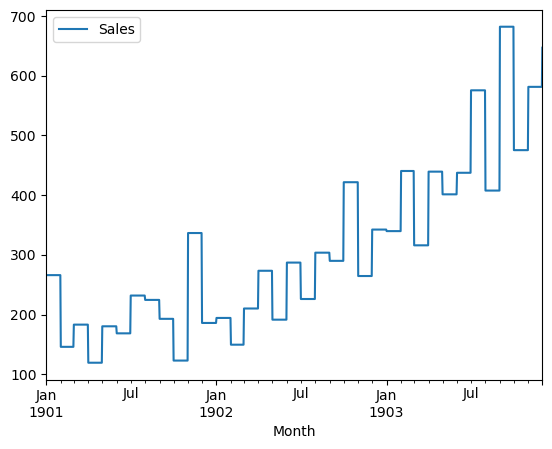

In [185]:
upsampled.ffill().plot()

In [188]:
quarterly_mean_sales = data_sh2.resample('Q').mean()

<Axes: xlabel='Month'>

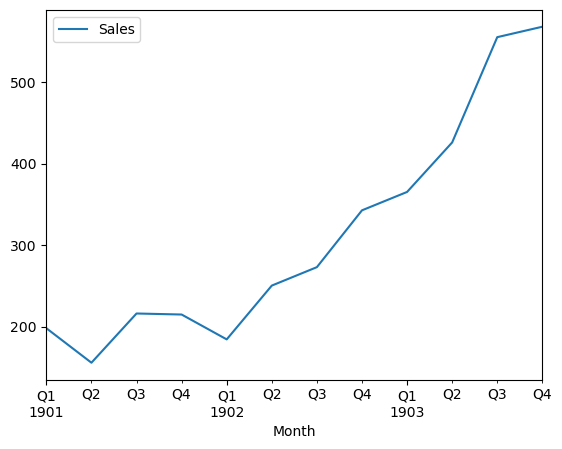

In [189]:
quarterly_mean_sales.plot()

<Axes: xlabel='Month'>

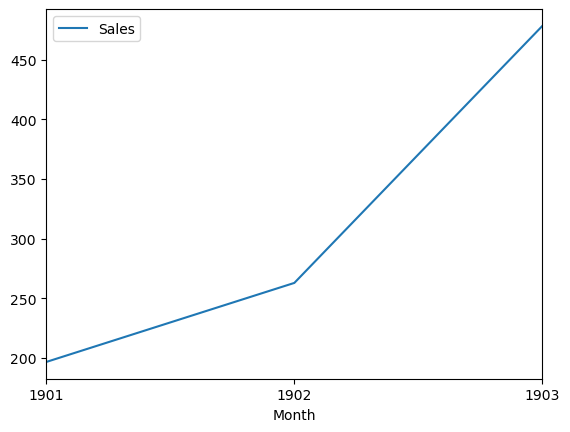

In [191]:
yearly_mean_sales = data_sh2.resample('A').mean()
yearly_mean_sales.plot()

### 2.4 Moving Average Smoothing
- Centered Moving Average
- Trailing Moving Average
- Use the dataset: 'daily-total-female-births.csv'


In [192]:
import pandas as pd
from matplotlib import pyplot as plt

In [193]:
bdata = pd.read_csv('daily-total-female-births.csv', index_col=0, parse_dates=True)

In [195]:
bdata.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [196]:
bdata.shape

(365, 1)

In [197]:
rolling = bdata.rolling(window=3)

In [198]:
rolling

Rolling [window=3,center=False,axis=0,method=single]

In [200]:
rolling_mean = rolling.mean()

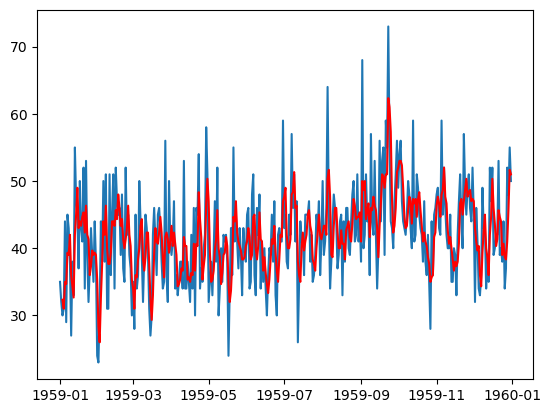

In [203]:
plt.plot(bdata)
plt.plot(rolling_mean, color='red')

(array([-4018., -4004., -3987., -3973., -3959., -3945., -3928.]),
 [Text(-4018.0, 0, '1959-01-01'),
  Text(-4004.0, 0, '1959-01-15'),
  Text(-3987.0, 0, '1959-02-01'),
  Text(-3973.0, 0, '1959-02-15'),
  Text(-3959.0, 0, '1959-03-01'),
  Text(-3945.0, 0, '1959-03-15'),
  Text(-3928.0, 0, '1959-04-01')])

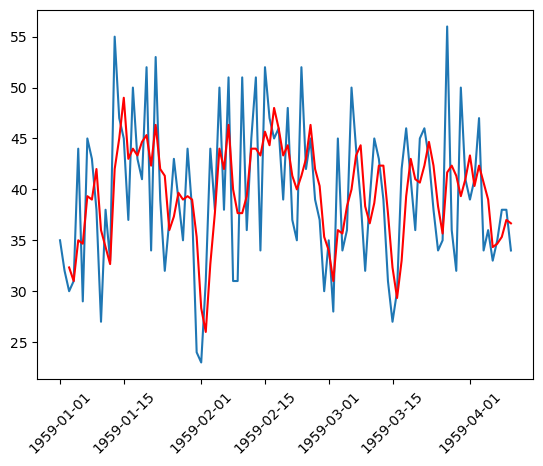

In [207]:
plt.plot(bdata[:100])
plt.plot(rolling_mean[:100], color='red')
plt.xticks(rotation=45)